

---


**การนำเข้าข้อมูล**


---
ใช้ข้อมูลจากไฟล์ .csv เก็บเป็น DataFrame



In [23]:
import numpy as np
import pandas as pd
data = pd.read_csv("price.csv")

แสดงข้อมูลที่อ่านได้


In [24]:
print(data)

     a     b
0   47  3975
1   42  3930
2   31  1856
3   34  3017
4   60  4178
5   42  3891
6   52  3885
7   52  3988
8   47  4024
9   50  3921
10  38  3560
11  44  3878
12  50  3791
13  47  3918
14  48  3939
15  38  3565
16  53  3970
17  48  3905
18  59  4130
19  39  2930


**เก็บข้อมูลไว้ในตัวแปร :**

*   x = พื้นที่ห้อง
*   y = ราคา


In [25]:
x= np.array(data["a"])
y= np.array(data["b"])

**แสดงข้อมูลพื้นที่**

In [26]:
print (x)

[47 42 31 34 60 42 52 52 47 50 38 44 50 47 48 38 53 48 59 39]


**ปรับขนาดของข้อมูล**
> หลังจากนั้นตรวจสอบข้อมูลที่ปรับขนาดแล้ว

In [27]:
x = x.reshape(-1, 1)
print (x)

[[47]
 [42]
 [31]
 [34]
 [60]
 [42]
 [52]
 [52]
 [47]
 [50]
 [38]
 [44]
 [50]
 [47]
 [48]
 [38]
 [53]
 [48]
 [59]
 [39]]


**สร้างกราฟจากข้อมูล**


> plt.scatter คือ คำสั่งในการสร้างกราฟจุด

> marker = '+' สามารถเปลี่ยนอักขระได้ ตรวจสอบอักขระที่เปลี่ยนได้ที่ [matplotlib.markers](https://matplotlib.org/stable/api/markers_api.html)




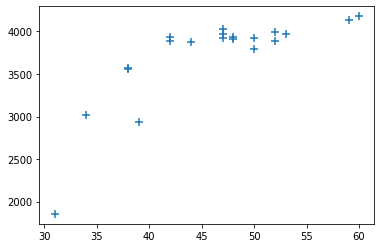

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s = 80, marker='+')
plt.show()



---
**เริ่ม Train โมเดล**


---
โดยใช้เครื่องมือจากไลบรารี sklearn

*   เรียกใช้งาน LinearRegression จาก sklearn.linear_model
*   Normalize คือ การลดข้อมูลที่ซ้ำซ้อน

*   ใช้ LinearRegression เทรนโมเดล











In [31]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
LR.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)


---
**วัดประสิทธิภาพโมเดล**

---

กำหนดให้ค่าที่ทำนายได้เก็บไว้ในตัวแปร y_pred


In [35]:
y_pred = LR.predict(x)

**วัดจากค่า Root Mean Square Error**

In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print ('RMSE (Root Mean Squared Error) = ', rmse)

RMSE (Root Mean Squared Error) =  332.7662119033552


**วัดจากค่า R Square**

In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print ('R2 = ', r2)

R2 =  0.6047574272689302


**แสดงกราฟเปรียบเทียบข้อมูลและผลลัพธ์ที่ทำนายได้**

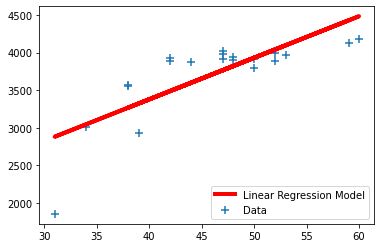

In [ ]:
# Plot ข้อมูล (x,y) 
plt.scatter(x, y, s = 80, marker = '+', label = 'Data')

# Plot Linear Regression Model (x,y_pred)
plt.plot(x, y_pred, linewidth = 4, color = 'r', label = 'Linear Regression Model')
plt.legend(loc='lower right')
plt.show()

---
**ทำนายราคา**

---


In [ ]:
LR.predict([[63]])

array([4648.67838337])